### Load Data

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('machine_temperature_system_failure.csv')

In [30]:
df.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [31]:
df.describe()

,value
count,22695.000000
mean,85.926498
std,13.746912
min,2.084721
25%,83.080078
50%,89.408246
75%,94.016252
max,108.510543


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      22695 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [33]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [34]:
# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [35]:
df.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22695 non-null  datetime64[ns]
 1   value      22695 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 354.7 KB


### Data Visiualization

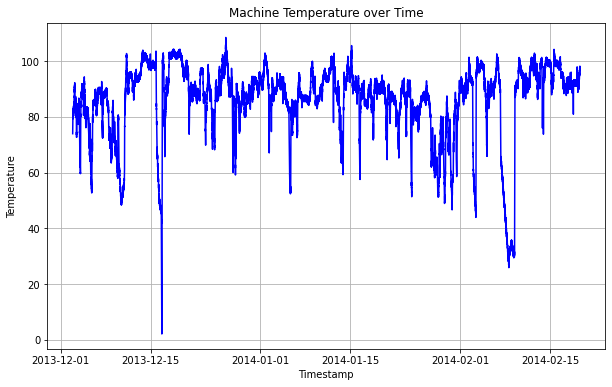

In [37]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], color='blue')
plt.title('Machine Temperature over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

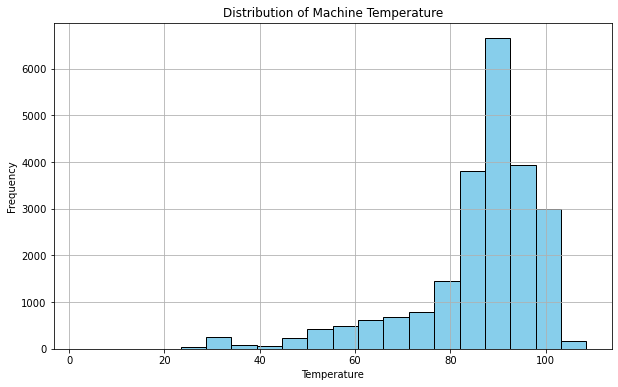

In [38]:
#Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Machine Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

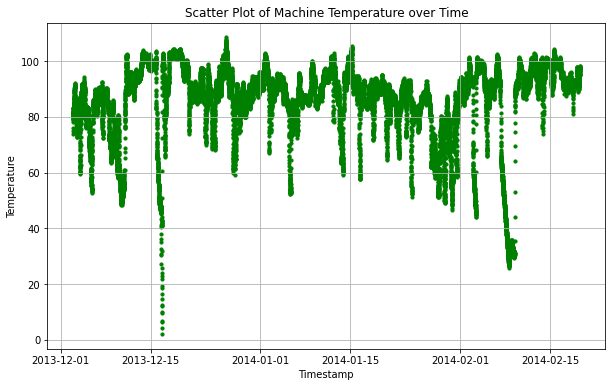

In [39]:
#Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['value'], s=10, color='green')
plt.title('Scatter Plot of Machine Temperature over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

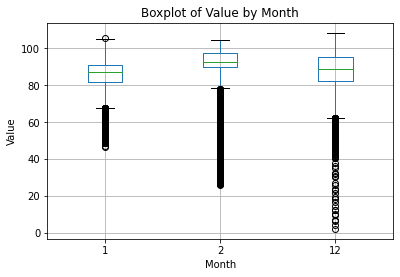

In [40]:
#Box Plot
df['timestamp_month'] = df['timestamp'].dt.month
plt.figure(figsize=(10, 6))
df.boxplot(column='value', by='timestamp_month')
plt.title('Boxplot of Value by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.suptitle('')
plt.show()

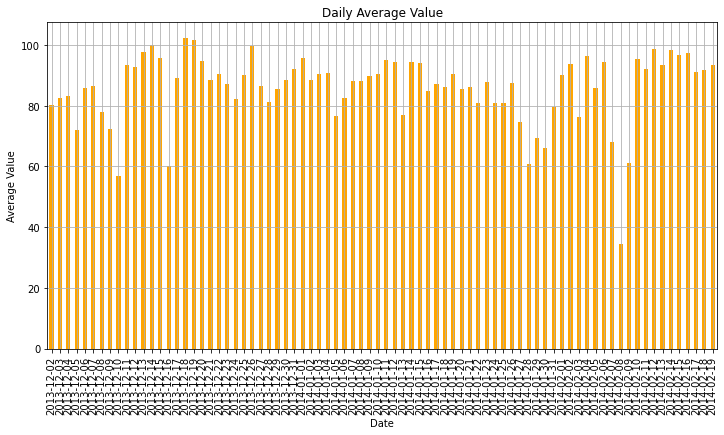

In [41]:
#Bar Plot

df['timestamp_day'] = df['timestamp'].dt.date

daily_avg = df.groupby('timestamp_day')['value'].mean()

plt.figure(figsize=(12, 6))
daily_avg.plot(kind='bar', color='orange')
plt.title('Daily Average Value')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

### Preprocess Data

In [42]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [43]:
# Set the timestamp column as the index and convert to a series
series = df.set_index('timestamp')['value'].squeeze()

In [44]:
# Convert series to a windowed dataset
def create_dataset(series, window_size=20):
    X = []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size].values)
    return np.array(X)

window_size = 150
latent_dim = 3
epochs = 10

# Create dataset
X = create_dataset(series, window_size)

In [ ]:
# Split data into training, validation, and test sets
X_train, X_temp = train_test_split(X, test_size=0.3, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

***AUTOENCODERS:***

In [45]:
# Define the autoencoder model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(window_size,)),
    keras.layers.Dense(latent_dim, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(window_size, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

# Fit the model, with verbose set to 1 to print the loss for each epoch
history = model.fit(X_train, X_train, epochs=epochs, validation_data=(X_val, X_val), verbose=1)

Epoch 1/10
494/494 [==============================] - 5s 5ms/step - loss: 366.3406 - val_loss: 35.4945
Epoch 2/10
494/494 [==============================] - 2s 5ms/step - loss: 23.4795 - val_loss: 18.1486
Epoch 3/10
494/494 [==============================] - 3s 6ms/step - loss: 16.4335 - val_loss: 17.3620
Epoch 4/10
494/494 [==============================] - 3s 6ms/step - loss: 16.2918 - val_loss: 17.1989
Epoch 5/10
494/494 [==============================] - 3s 6ms/step - loss: 16.3645 - val_loss: 17.1959
Epoch 6/10
494/494 [==============================] - 3s 6ms/step - loss: 16.3744 - val_loss: 17.0667
Epoch 7/10
494/494 [==============================] - 3s 6ms/step - loss: 16.3938 - val_loss: 18.0791
Epoch 8/10
494/494 [==============================] - 3s 5ms/step - loss: 16.2266 - val_loss: 17.5966
Epoch 9/10
494/494 [==============================] - 3s 5ms/step - loss: 16.1901 - val_loss: 16.7016
Epoch 10/10
494/494 [==============================] - 3s 5ms/step - loss: 16.116

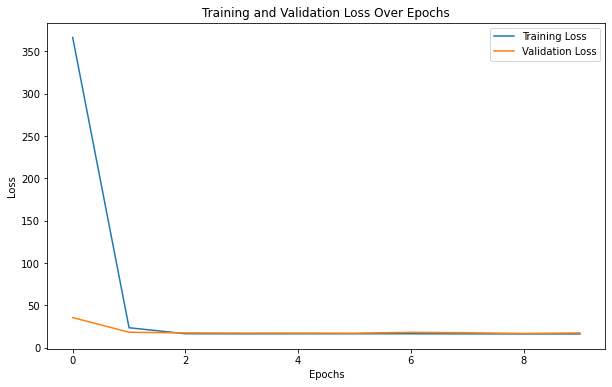

In [46]:
# Access the history to retrieve training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
# Predict on the test set
X_pred_test = model.predict(X_test)
mse_test = np.mean(np.power(X_test - X_pred_test, 2), axis=1)
threshold = np.percentile(mse_test, 95)
anomalies_index = np.where(mse_test >= threshold)[0] + window_size

106/106 [==============================] - 1s 4ms/step


In [48]:
# R2 score on the test set
r2_test = r2_score(X_test.flatten(), X_pred_test.flatten())
print("R2 score on test set:", r2_test)

R2 score on test set: 0.918917506533396


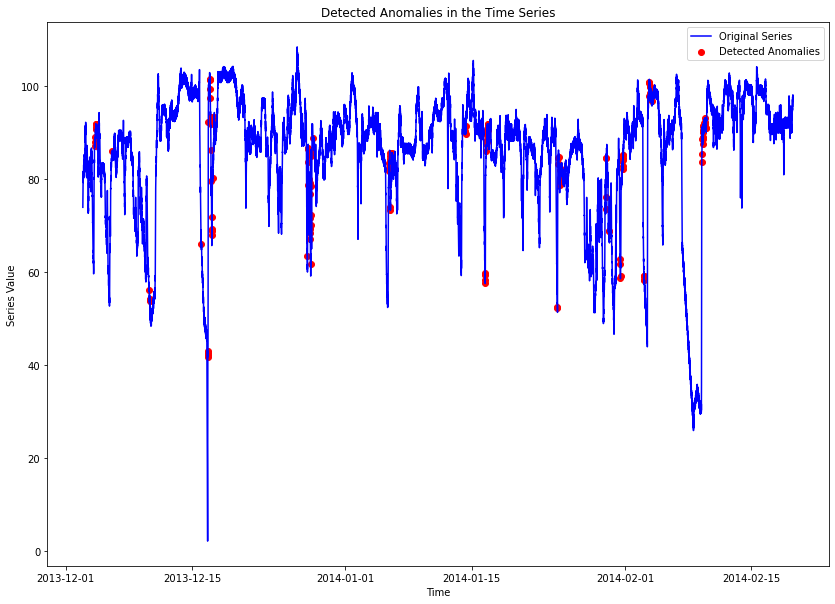

In [49]:
# Calculate the original indices for the entire dataset after windowing
original_indices = np.arange(window_size, len(series))

# Split original indices into training, validation, and test sets (same random_state and test_size)
original_train, original_temp = train_test_split(original_indices, test_size=0.3, random_state=42)
original_val, original_test = train_test_split(original_temp, test_size=0.5, random_state=42)

# Extract the original indices for anomalies by mapping the anomalies_index to original_test
anomalies_original_indices = original_test[anomalies_index - window_size]

# Plotting
plt.figure(figsize=(14, 10))
plt.plot(series.index, series.values, label='Original Series', color='blue')
plt.scatter(series.index[anomalies_original_indices], series.values[anomalies_original_indices], color='red', label='Detected Anomalies')
plt.title('Detected Anomalies in the Time Series')
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend()
plt.show()

In [50]:
# Calculate RMSE
rmse = np.sqrt(np.mean(np.power(X_test - X_pred_test, 2)))

# Calculate R-squared
r2 = r2_score(X_test.flatten(), X_pred_test.flatten())

# Print the metrics
print("Mean Squared Error (MSE):", np.mean(mse_test))
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
# Save the weights of the trained model
model.save_weights('autoencoder_weights.h5')

Mean Squared Error (MSE): 15.143405795232493
Root Mean Squared Error (RMSE): 3.8914529157157345
R-squared (R2): 0.918917506533396


In [51]:
# Convert MSE to binary labels (anomaly or not)
y_true = (mse_test >= threshold).astype(int)

# Convert predicted MSE to binary predictions
y_pred = np.ones_like(y_true)  # Predict all as anomalies
y_pred[mse_test < threshold] = 0  # Correct the predictions for non-anomalies

# Calculate test accuracy
test_accuracy = np.mean(y_true == y_pred)

# Calculate test loss (mean squared error)
test_loss = np.mean(mse_test)

print("Test Accuracy:", test_accuracy)
print("Test Loss (MSE):", test_loss)

Test Accuracy: 1.0
Test Loss (MSE): 15.143405795232493


In [52]:
model_deep = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(window_size,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(latent_dim, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(window_size, activation='linear')
])

model_deep.compile(optimizer='adam', loss='mse')

history_deep = model_deep.fit(X_train, X_train, epochs=epochs,
                              validation_data=(X_val, X_val), verbose=1)

Epoch 1/10
494/494 [==============================] - 6s 7ms/step - loss: 208.8713 - val_loss: 17.6429
Epoch 2/10
494/494 [==============================] - 3s 6ms/step - loss: 12.8353 - val_loss: 10.1548
Epoch 3/10
494/494 [==============================] - 3s 6ms/step - loss: 9.3456 - val_loss: 9.4625
Epoch 4/10
494/494 [==============================] - 3s 6ms/step - loss: 9.0249 - val_loss: 9.4437
Epoch 5/10
494/494 [==============================] - 3s 6ms/step - loss: 8.8958 - val_loss: 9.1224
Epoch 6/10
494/494 [==============================] - 3s 6ms/step - loss: 8.7253 - val_loss: 8.7667
Epoch 7/10
494/494 [==============================] - 3s 6ms/step - loss: 8.6096 - val_loss: 9.4418
Epoch 8/10
494/494 [==============================] - 3s 5ms/step - loss: 8.4698 - val_loss: 8.4958
Epoch 9/10
494/494 [==============================] - 3s 6ms/step - loss: 8.4028 - val_loss: 8.3915
Epoch 10/10
494/494 [==============================] - 3s 7ms/step - loss: 8.2760 - val_loss: 7

In [53]:
denoising_model = keras.Sequential([
    keras.layers.GaussianNoise(0.1, input_shape=(window_size,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(latent_dim, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(window_size, activation='linear')
])

denoising_model.compile(optimizer='adam', loss='mse')
history_denoise = denoising_model.fit(X_train, X_train, epochs=epochs,
                              validation_data=(X_val, X_val), verbose=1)

Epoch 1/10
494/494 [==============================] - 5s 6ms/step - loss: 408.5215 - val_loss: 37.0830
Epoch 2/10
494/494 [==============================] - 3s 6ms/step - loss: 35.7732 - val_loss: 37.4614
Epoch 3/10
494/494 [==============================] - 3s 6ms/step - loss: 35.8456 - val_loss: 37.0316
Epoch 4/10
494/494 [==============================] - 3s 6ms/step - loss: 35.9940 - val_loss: 36.9076
Epoch 5/10
494/494 [==============================] - 3s 6ms/step - loss: 36.0250 - val_loss: 36.9255
Epoch 6/10
494/494 [==============================] - 3s 6ms/step - loss: 36.1792 - val_loss: 38.1308
Epoch 7/10
494/494 [==============================] - 3s 6ms/step - loss: 36.1314 - val_loss: 37.0435
Epoch 8/10
494/494 [==============================] - 3s 6ms/step - loss: 36.1429 - val_loss: 37.0509
Epoch 9/10
494/494 [==============================] - 3s 6ms/step - loss: 36.2283 - val_loss: 37.3832
Epoch 10/10
494/494 [==============================] - 3s 6ms/step - loss: 36.135

In [54]:
model_dense = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(window_size,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(latent_dim, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(window_size, activation='linear')
])

model_dense.compile(optimizer='adam', loss='mse')
history_dense = denoising_model.fit(X_train, X_train, epochs=epochs,
                              validation_data=(X_val, X_val), verbose=1)

Epoch 1/10
494/494 [==============================] - 3s 6ms/step - loss: 36.2167 - val_loss: 37.0866
Epoch 2/10
494/494 [==============================] - 3s 6ms/step - loss: 36.1724 - val_loss: 36.9411
Epoch 3/10
494/494 [==============================] - 3s 6ms/step - loss: 36.1150 - val_loss: 37.7312
Epoch 4/10
494/494 [==============================] - 3s 6ms/step - loss: 36.0577 - val_loss: 36.9508
Epoch 5/10
494/494 [==============================] - 3s 6ms/step - loss: 36.0677 - val_loss: 37.1457
Epoch 6/10
494/494 [==============================] - 3s 6ms/step - loss: 36.0836 - val_loss: 37.6375
Epoch 7/10
494/494 [==============================] - 3s 6ms/step - loss: 36.1311 - val_loss: 37.0492
Epoch 8/10
494/494 [==============================] - 3s 6ms/step - loss: 36.0679 - val_loss: 37.1302
Epoch 9/10
494/494 [==============================] - 3s 5ms/step - loss: 35.9341 - val_loss: 37.0663
Epoch 10/10
494/494 [==============================] - 3s 5ms/step - loss: 36.0010

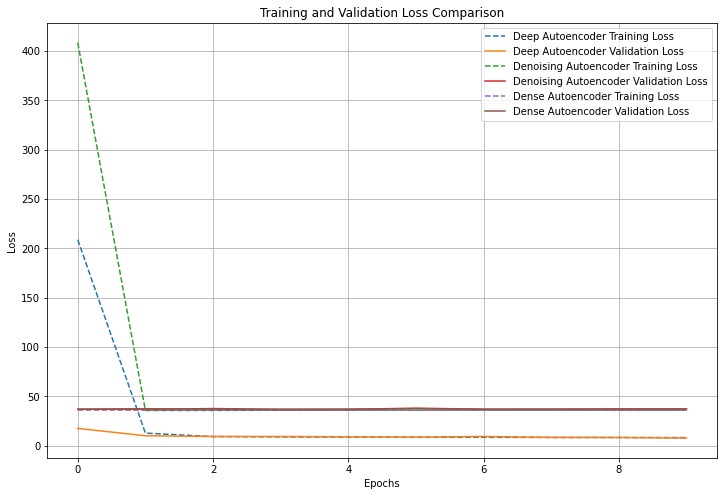

In [55]:
import matplotlib.pyplot as plt

# Extracting the losses from the history objects
train_loss_deep = history_deep.history['loss']
val_loss_deep = history_deep.history['val_loss']

train_loss_denoise = history_denoise.history['loss']
val_loss_denoise = history_denoise.history['val_loss']

train_loss_dense = history_dense.history['loss']
val_loss_dense = history_dense.history['val_loss']

# Plotting the training and validation loss for each model
plt.figure(figsize=(12, 8))
plt.plot(train_loss_deep, label='Deep Autoencoder Training Loss', linestyle='--')
plt.plot(val_loss_deep, label='Deep Autoencoder Validation Loss', linestyle='-')

plt.plot(train_loss_denoise, label='Denoising Autoencoder Training Loss', linestyle='--')
plt.plot(val_loss_denoise, label='Denoising Autoencoder Validation Loss', linestyle='-')

plt.plot(train_loss_dense, label='Dense Autoencoder Training Loss', linestyle='--')
plt.plot(val_loss_dense, label='Dense Autoencoder Validation Loss', linestyle='-')

plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# Predict on the test set for each model
X_pred_test_deep = model_deep.predict(X_test)
mse_test_deep = np.mean(np.power(X_test - X_pred_test_deep, 2), axis=1)
threshold_deep = np.percentile(mse_test_deep, 95)
anomalies_index_deep = np.where(mse_test_deep >= threshold_deep)[0] + window_size

r2_test_deep = r2_score(X_test.flatten(), X_pred_test_deep.flatten())

# Convert MSE to binary labels (anomaly or not) for each model
y_true_deep = (mse_test_deep >= threshold_deep).astype(int)
y_pred_deep = np.ones_like(y_true_deep)
y_pred_deep[mse_test_deep < threshold_deep] = 0
test_accuracy_deep = np.mean(y_true_deep == y_pred_deep)

# RMSE for each model
rmse_deep = np.sqrt(np.mean(np.power(X_test - X_pred_test_deep, 2)))

print("Deep Autoencoder:")
print("Mean Squared Error (MSE):", np.mean(mse_test_deep))
print("Root Mean Squared Error (RMSE):", rmse_deep)
print("R-squared (R2):", r2_test_deep)
print("Test Accuracy:", test_accuracy_deep)

# Denoising Autoencoder
X_pred_test_denoise = denoising_model.predict(X_test)
mse_test_denoise = np.mean(np.power(X_test - X_pred_test_denoise, 2), axis=1)
threshold_denoise = np.percentile(mse_test_denoise, 95)
r2_test_denoise = r2_score(X_test.flatten(), X_pred_test_denoise.flatten())

y_true_denoise = (mse_test_denoise >= threshold_denoise).astype(int)
y_pred_denoise = np.ones_like(y_true_denoise)
y_pred_denoise[mse_test_denoise < threshold_denoise] = 0
test_accuracy_denoise = np.mean(y_true_denoise == y_pred_denoise)

rmse_denoise = np.sqrt(np.mean(np.power(X_test - X_pred_test_denoise, 2)))

print("\nDenoising Autoencoder:")
print("Mean Squared Error (MSE):", np.mean(mse_test_denoise))
print("Root Mean Squared Error (RMSE):", rmse_denoise)
print("R-squared (R2):", r2_test_denoise)
print("Test Accuracy:", test_accuracy_denoise)

# Dense Autoencoder
X_pred_test_dense = model_dense.predict(X_test)
mse_test_dense = np.mean(np.power(X_test - X_pred_test_dense, 2), axis=1)
threshold_dense = np.percentile(mse_test_dense, 95)
r2_test_dense = r2_score(X_test.flatten(), X_pred_test_dense.flatten())

y_true_dense = (mse_test_dense >= threshold_dense).astype(int)
y_pred_dense = np.ones_like(y_true_dense)
y_pred_dense[mse_test_dense < threshold_dense] = 0
test_accuracy_dense = np.mean(y_true_dense == y_pred_dense)

rmse_dense = np.sqrt(np.mean(np.power(X_test - X_pred_test_dense, 2)))

print("\nDense Autoencoder:")
print("Mean Squared Error (MSE):", np.mean(mse_test_dense))
print("Root Mean Squared Error (RMSE):", rmse_dense)
print("R-squared (R2):", r2_test_dense)
print("Test Accuracy:", test_accuracy_dense)


106/106 [==============================] - 1s 4ms/step
Deep Autoencoder:
Mean Squared Error (MSE): 7.327946504791988
Root Mean Squared Error (RMSE): 2.7070180096911045
R-squared (R2): 0.9607639006289141
Test Accuracy: 1.0
106/106 [==============================] - 1s 4ms/step

Denoising Autoencoder:
Mean Squared Error (MSE): 35.67202357620589
Root Mean Squared Error (RMSE): 5.972606095851784
R-squared (R2): 0.8090009171207148
Test Accuracy: 1.0
106/106 [==============================] - 1s 4ms/step

Dense Autoencoder:
Mean Squared Error (MSE): 7633.31525706464
Root Mean Squared Error (RMSE): 87.36884603257981
R-squared (R2): -39.87113842345331
Test Accuracy: 1.0


In [57]:
# Save the weights of each model
model_deep.save_weights('autoencoder_deep_weights.h5')
denoising_model.save_weights('autoencoder_denoise_weights.h5')
model_dense.save_weights('autoencoder_dense_weights.h5')
